In [1]:
%matplotlib inline

# Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. 
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to [NumPy’s](https://numpy.org/) ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see `bridge-to-np-label`). Tensors are also optimized for automatic differentiation (we'll see more about that later in the Autograd unit). If you’re familiar with `ndarrays`, you’ll be right at home with the Tensor API. If not, follow along!

Let's start by setting up our environment.



In [2]:
import torch
import numpy as np

## Initializing a Tensor
Tensor를 초기화하는 방법에 대해 알아본다.


Tensors can be created directly from data.

In [3]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

### From a numpy array

Tensors can be created from NumPy arrays ( and vice versa )


In [4]:
np_array = np.array (data)
x_np = torch.from_numpy(np_array)

### From another tensor

The new tensor retains the properties (shape, data type) of the argument tnesor, unless explicitly overriden.

In [5]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor : \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype =torch.float) #overrides the properties of x_data
print(f"Random Tensor : \n {x_rand} \n ")

Ones Tensor : 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor : 
 tensor([[0.5659, 0.5442],
        [0.9260, 0.0223]]) 
 


### With random or constant values

`shape` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [6]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor : \n {rand_tensor} \n")
print(f"Ones Tensor : \n {ones_tensor} \n ")
print(f"Zeros Tensor : \n {zeros_tensor} \n")

Random Tensor : 
 tensor([[0.8081, 0.3281, 0.1736],
        [0.9436, 0.5712, 0.5007]]) 

Ones Tensor : 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 
 
Zeros Tensor : 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



## Attributes of a Tensor

Tensor attributes describe their shape, data type, and the device on which they are stored.

In [7]:
tensor = torch.rand(3,4)


print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Operations on Tensors

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation(transposing, indexing, slicing), sampling and more are able in torch.

Each of these operations can be run on the GPU.

By default, tensors are created on the CPU. We need to explicitly more tensors to the GPU using `.to` method. Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!

In [8]:
if torch.cuda.is_available() :
    print("tensor has been moved into the GPU")
    tensor = tensor.to('cuda')

Try out some of the operations from the list. If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.

In [9]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


## Joining tensors
You can use `torch.cat` to concatenate a sequence of tensors along a given dimension.
See also [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html),
another tensor joining op that is subtly different from ``torch.cat``.



In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


## Arithmetic operations

In [11]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)



tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [12]:
print(tensor @ tensor.T)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [13]:
# This computes the element-wise product
z1 = tensor * tensor
print(z1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [14]:
z2 = tensor.mul(tensor)

In [15]:
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

## Single-element tensors

If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using `item()`

In [16]:
agg = tensor.sum()
agg_item = agg.item()
print(type(agg), agg, type(agg_item), agg_item)

<class 'torch.Tensor'> tensor(12.) <class 'float'> 12.0


## In-place operations
Operations that store the result into the operand are called in-place. They are denoted by a ``_`` suffix. 
For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.

> **Note:** In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.



In [17]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Bridge with NumPy

Tensors on the CPU and NumPy Arrays can share their underlying memory locations, and changing one will change the other.

### Tensor to NumPy array

In [18]:
t = torch.ones(5)
print(f"t:{t}")
n = t.numpy()
print(f"n:{n}")

t:tensor([1., 1., 1., 1., 1.])
n:[1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.

In [19]:
t.add_(1)
print(f"t:{t}")
print(f"n:{n}")

t:tensor([2., 2., 2., 2., 2.])
n:[2. 2. 2. 2. 2.]


### Numpy array to Tensor

In [20]:
n = np.ones(5)
t = torch.from_numpy(n)

Change in the Numpy array reflects in the tensor.

In [21]:
np.add(n, 1, out=n)
print(f"t :{t}")
print(f"n : {n}")

t :tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n : [2. 2. 2. 2. 2.]


-----------

# Load data with PyTorch Datasets and DataLoaders

## DataSets and Dataloaders

torch에서는 두 종류의 data 메서드를 제공한다.

`torch.utils.data.DataLoader`

`torch.utils.data.Dataset`

이 두 메서드는 데이터를 새로 불러오거나, 이미 로드된 데이터를 활용할 ㅜㅅ 있도록 한다. 

`Dataset`은 sample과 corresponding label을 저장한다.

`DataLoader`는 `Dataset`을 iterable하게 접근할 수 있도록 한다. 

여기서는 PyTorch에서 기본적으로 제공하는 기본 데이터셋 중 하나인 FashionMNIST를 사용하여 implement해 볼 것이다.

## Loading a dataset

Here is an example of how to load the [Fashion-MNIST](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) dataset from TorchVision.
Fashion-MNIST is a dataset of Zalando’s article images consisting of of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:
 - `root` is the path where the train/test data is stored,
 - `train` specifies training or test dataset,
 - `download=True` downloads the data from the Internet if it's not available at `root`.
 - `transform` and `target_transform` specify the feature and label transformations



In [22]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root ="data",
    train =False,
    download = True,
    transform = ToTensor(),
)

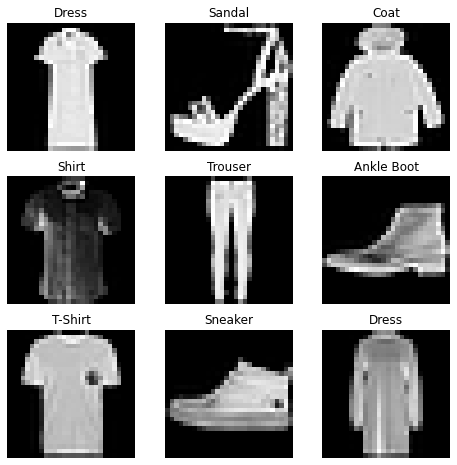

In [23]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = 'gray')
plt.show()

## Creating a Custom Dataset for your files
---------------------------------------------------

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`. 
Take a look at this implementation; the FashionMNIST images are stored 
in a directory ``img_dir``, and their labels are stored separately in a CSV file ``annotations_file``. 

In the next sections, we'll break down what's happening in each of these functions.



In [24]:
import os
import pandas as pd
import torchvision.io as tvio

class CustomImageDataset(Dataset):
    def __init__ (self, annotations_file, img_dir, transform=None, target_tranform=None) :
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__ (self) :
        return len(self.img_labels)
    
    def __getitem__(self, idx) :
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = tvio.read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.tranform :
            image = self.tranform(image)
        if self.target_transform :
            label = self.target_tranform(label)
            
        sample = {"image":image, "label":label}
        return sample
    

## init

The `__init__` function is run once when instantiating the Dataset object. We initialize
the directory containing the images, the annotations file, and both transforms (covered 
in more detail in the next section). 

The labels.csv file looks like:
```

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9
```
Example:
```
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
```

## len

The `__len__` function returns the number of samples in our dataset.

Example:
```
def __len__(self):
    return len(self.img_labels)
```


## getitem

The `__getitem__` function loads and returns a sample from the dataset at the given index `idx`. 
Based on the index, it identifies the image's location on disk, converts that to a tensor using `read_image`, retrieves the 
corresponding label from the csv data in `self.img_labels`, calls the transform functions on them (if applicable), and returns the 
tensor image and corresponding label in a Python `dict`.

Example:
```
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    sample = {"image": image, "label": label}
    return sample
```

Preparing your data for training with DataLoaders
-------------------------------------------------
The ``Dataset`` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to 
pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's ``multiprocessing`` to
speed up data retrieval.

``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.



In [25]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader( training_data, batch_size = 64, shuffle =True)
test_dataloader = DataLoader(test_data, batch_size =64, shuffle=True)


## Iterate through the DataLoader

We have loaded that dataset into the `Dataloader` and can iterate through the dataset as needed.
Each iteration below returns a batch of `train_features` and `train_labels`(containing `batch_size=64` features and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled (for finer-grained control over  the data loading order, take a look at [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler>).



Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])


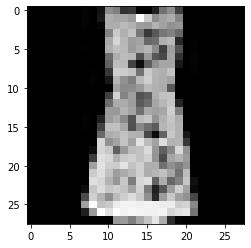

Label : 3


In [33]:
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape : {train_features.size()}")
print(f"Labels batch shape : {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap= "gray")
plt.show()

print(f"Label : {label}")

# Transform the data

# Transforms

Data does not always come in its final processed form that is required for 
training machine learning algorithms. We use **transforms** to perform some
manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters (`transform` to modify the features and
`target_transform` to modify the labels) that accept callables containing the transformation logic.
The [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html) module offers 
several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers.
For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors.
To make these transformations, we use `ToTensor` and `Lambda`.

In [27]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y : torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [28]:
onehot_dataloader = DataLoader( ds, batch_size = 64, shuffle =True)

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64, 10])


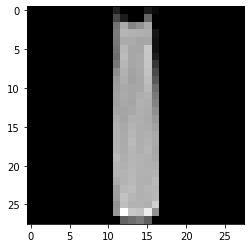

Label : tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])


In [29]:
onehot_features, onehot_labels = next(iter(onehot_dataloader))

print(f"Feature batch shape : {onehot_features.size()}")
print(f"Labels batch shape : {onehot_labels.size()}")

img = onehot_features[0].squeeze()
label = onehot_labels[0]

plt.imshow(img, cmap= "gray")
plt.show()

print(f"Label : {label}")


In [30]:
img.type()

'torch.FloatTensor'

## ToTensor()

[ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor) 
converts a PIL image or NumPy `ndarray` into a `FloatTensor` and scales the image's pixel intensity values in the range \[0., 1.\]

## Lambda transforms

Lambda transforms apply any user-defined lambda function. Here, we define a function 
to turn the integer into a one-hot encoded tensor. 
It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls 
[scatter](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.scatter_) which assigns a 
`value=1` on the index as given by the label `y`.

In [31]:
target_transform = Lambda(lambda y : torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y),value=1))